# Correction du brief american-dream avec les points à améliorer

Plusieurs points devaient être améliorés :

* Elaboration d'un README.md afin d'expliquer l'analyse du dataset 🟢
* Correction sur l'affichage des salaires (suppression des chiffres après la virgule) 🟢
* Trier de façon croissante des variables dans l'affichage des histogramme 🟢
* Expliquer les résultats obtenus par rapport au nombre d'expérience et le salaire, à la disparité des salaires en fonction du sexe. 🟢

# I. Import des modules

In [2]:
#Pour que python reconnaisse un dossier comme un module il faut ajouter en son sein un chicchier __init__.py 
#et également l'ajouter au PATH
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/american-dream")


#On peut ensuite importer le dossier comme un module

from src.d00_utils.sqlite_utils import db_connect

# II. Import du jeu de données

In [3]:
# Connection with BDD version 1 (raw data lives there).

con = db_connect('../Data/02_intermediate/american_dream_v2.db')
cur = con.cursor()
cur.execute('pragma encoding=UTF8')
query_df1 = """
    SELECT * FROM salary_survey
"""

query_dfk = """
    SELECT * FROM dataset_kaggle
"""
df1 = pd.read_sql(query_df1,con=con)
dfk = pd.read_sql(query_dfk,con=con)

# III. Correction sur l'affichage des salaires (l'unité $ devait être ajouté)

## AVANT

<Figure size 2160x1440 with 0 Axes>

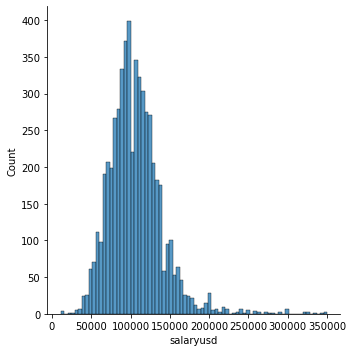

In [4]:
plt.figure(figsize=(30,20))
sns.displot(data=df1, x="salaryusd", kde=False)

## APRES

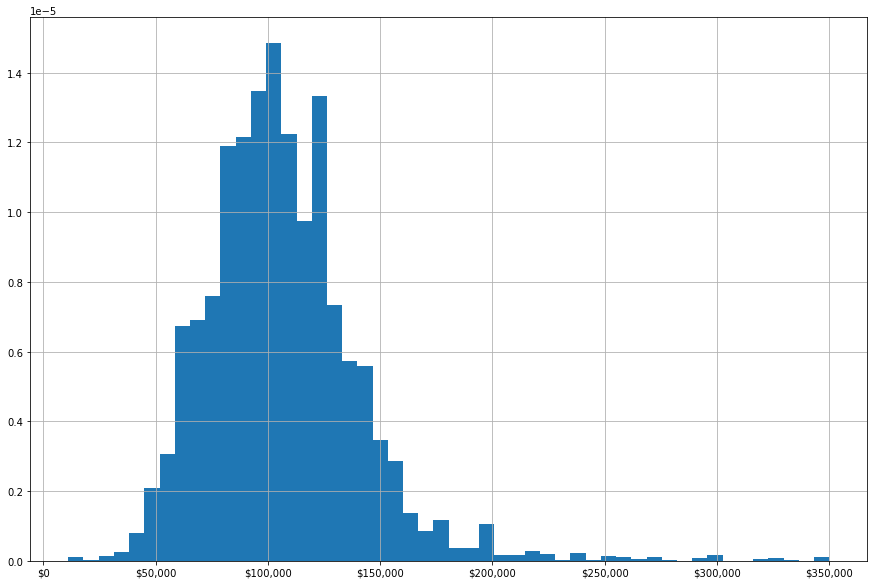

In [12]:
#Import du module mtick
import matplotlib.ticker as mtick

plt.figure(figsize=(15,10))
ax = df1['salaryusd'].hist(density=True, bins=50)

dollars_format = '${x:,.0f}'
tick = mtick.StrMethodFormatter(dollars_format)
ax.xaxis.set_major_formatter(tick)

# IV. Correction sur l'affichage des salaires (suppression des chiffres après la virgule)

## Pour l'affichage du .describe() sur les salaire US

### AVANT

In [15]:
median_salary_usa = round(df1['salaryusd'].median())
mean_salary_usa = round(df1['salaryusd'].describe()['mean'])

print("Le salaire moyen au USA est de {}$ et le salaire median est de {}$.(Base: Excel survey)".format(mean_salary_usa, median_salary_usa))
perc = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
df1['salaryusd'].describe(percentiles=perc)

Le salaire moyen au USA est de 106366$ et le salaire median est de 103000$.(Base: Excel survey)


count      5593.000000
mean     106365.748614
std       34256.961212
min       11100.000000
10%       68000.000000
20%       80000.000000
30%       89000.000000
40%       95000.000000
50%      103000.000000
60%      110000.000000
70%      120000.000000
80%      130000.000000
90%      145000.000000
max      350000.000000
Name: salaryusd, dtype: float64

### APRES

In [17]:
median_salary_usa = round(df1['salaryusd'].median())
mean_salary_usa = round(df1['salaryusd'].describe()['mean'])

print("Le salaire moyen au USA est de {}$ et le salaire median est de {}$.(Base: Excel survey)".format(mean_salary_usa, median_salary_usa))
perc = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
# Utilisation de la fonction round pour afficher les valeurs sans les chiffres après la virgule et ainsi avoir un résultat plus propre
round(df1['salaryusd'].describe(percentiles=perc))

Le salaire moyen au USA est de 106366$ et le salaire median est de 103000$.(Base: Excel survey)


count      5593.0
mean     106366.0
std       34257.0
min       11100.0
10%       68000.0
20%       80000.0
30%       89000.0
40%       95000.0
50%      103000.0
60%      110000.0
70%      120000.0
80%      130000.0
90%      145000.0
max      350000.0
Name: salaryusd, dtype: float64

## Pour l'affichage des salaire US en fonction du job title

### AVANT 

jobtitle
Analyst            79323.327536
Architect         135960.935760
Data Scientist    121488.694444
Database Admin    104876.328283
Developer          99799.980519
Engineer          110747.947955
Manager           124542.475936
Other              98254.000000
Name: salaryusd, dtype: float64


<AxesSubplot:title={'center':'Répartition de salaires en fonction des job titles'}, xlabel='jobtitle', ylabel='salaryusd'>

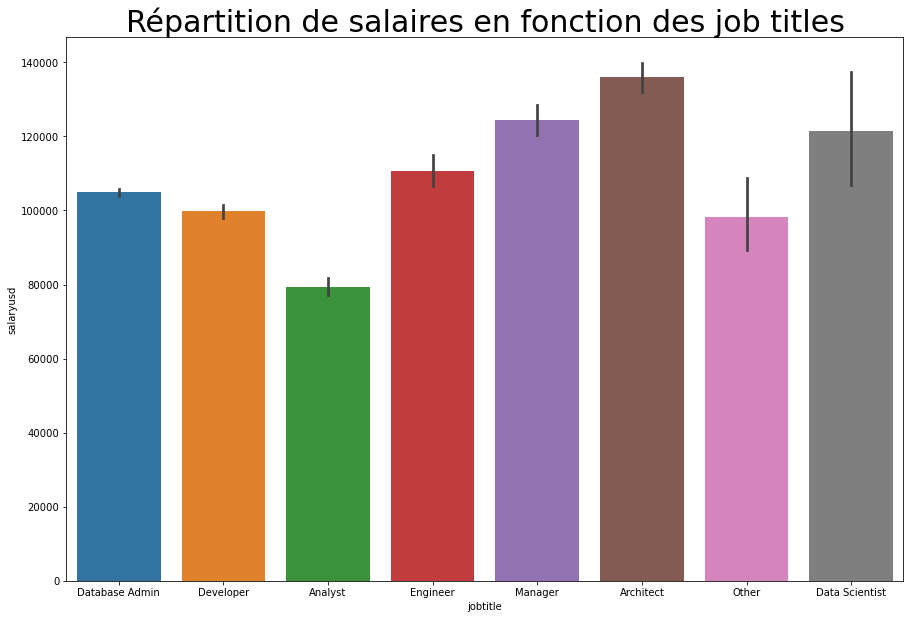

In [40]:
print(df1.groupby(df1['jobtitle'])['salaryusd'].mean())
plt.subplots(figsize=[15,10])
plt.title('Répartition de salaires en fonction des job titles', fontsize=30)
sns.barplot(x=df1['jobtitle'], y=df1['salaryusd'])

### APRES

jobtitle
Analyst            79323.0
Architect         135961.0
Data Scientist    121489.0
Database Admin    104876.0
Developer          99800.0
Engineer          110748.0
Manager           124542.0
Other              98254.0
Name: salaryusd, dtype: float64


<AxesSubplot:title={'center':'Répartition de salaires en fonction des job titles'}, xlabel='jobtitle', ylabel='salaryusd'>

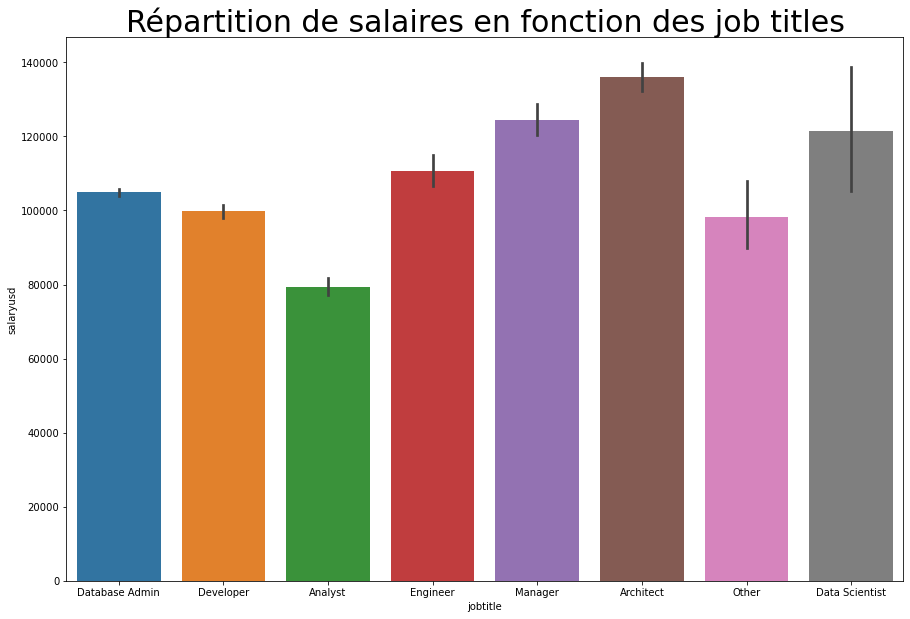

In [42]:
print(round(df1.groupby(df1['jobtitle'])['salaryusd'].mean()))
plt.subplots(figsize=[15,10])
plt.title('Répartition de salaires en fonction des job titles', fontsize=30)
sns.barplot(x=df1['jobtitle'], y=df1['salaryusd'])

# V. Correction sur le trie de façon croissant lors de la présentation de mon histogramme salaires en fonction du nombre d'entreprises

## AVANT

howmanycompanies
1             97062.0
2            107351.0
3            117631.0
4            119173.0
5            122923.0
6+           137034.0
Not Asked    105236.0
Name: salaryusd, dtype: float64


Text(0, 0.5, 'Salaire en Dollars')

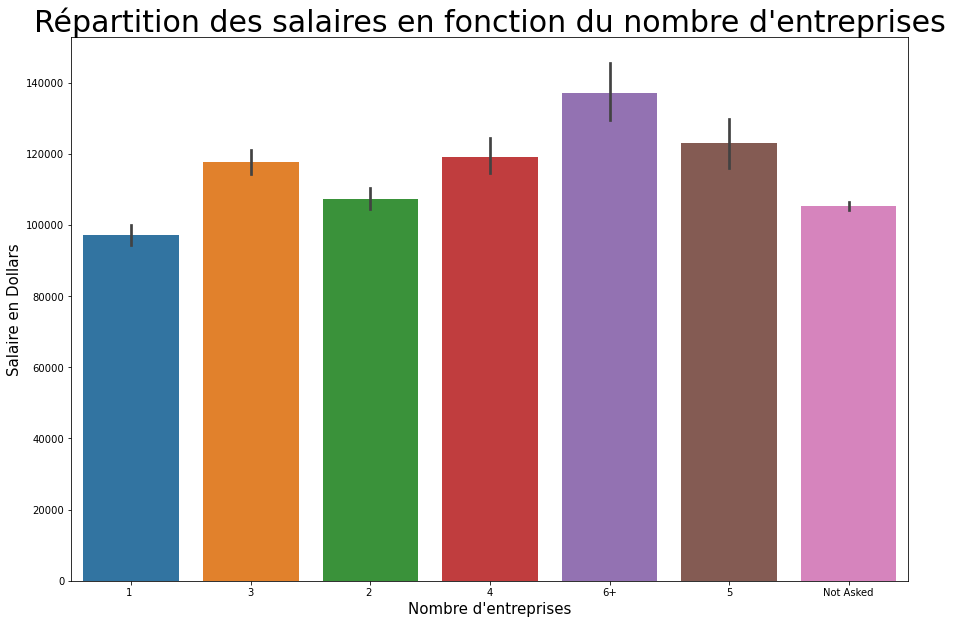

In [44]:
mean_by_nb_companies = round(df1.groupby(df1['howmanycompanies'])['salaryusd'].mean())
print(mean_by_nb_companies)
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction du nombre d\'entreprises', fontsize=30)
sns.barplot(x=df1['howmanycompanies'], y=df1['salaryusd'])
plt.xlabel('Nombre d\'entreprises', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)

## APRES

howmanycompanies
1             97062.0
2            107351.0
3            117631.0
4            119173.0
5            122923.0
6+           137034.0
Not Asked    105236.0
Name: salaryusd, dtype: float64


Text(0, 0.5, 'Salaire en Dollars')

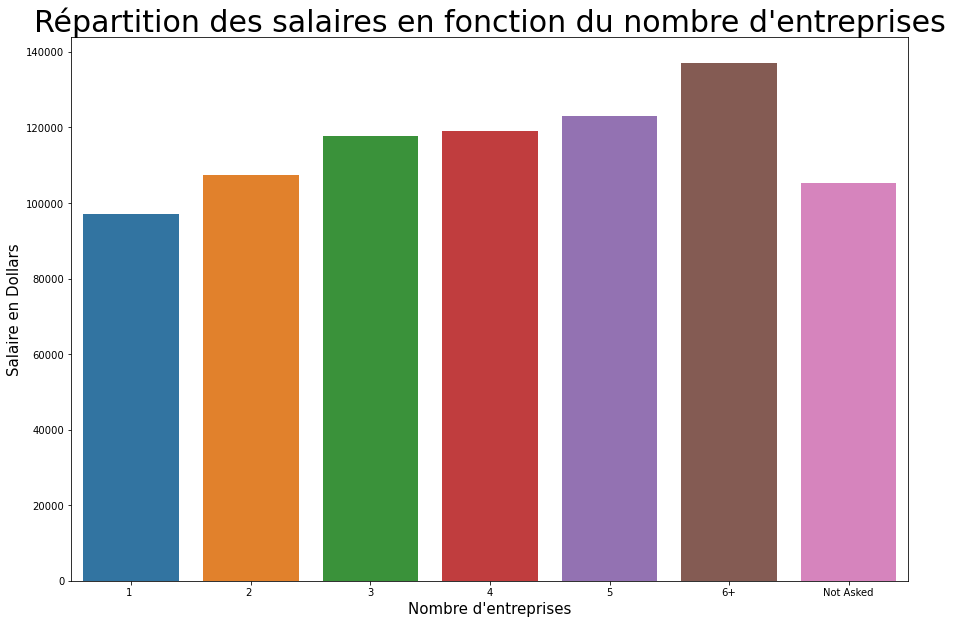

In [46]:
mean_by_nb_companies = round(df1.groupby(df1['howmanycompanies'])['salaryusd'].mean())
print(mean_by_nb_companies)
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction du nombre d\'entreprises', fontsize=30)
sns.barplot(x=mean_by_nb_companies.index, y=mean_by_nb_companies.values)
plt.xlabel('Nombre d\'entreprises', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)

# VI. Correction sur le trie de façon croissant lors de la présentation de mon histogramme salaires en fonction de la taille de l'équipe

## AVANT

Text(0, 0.5, 'Salaire en Dollars')

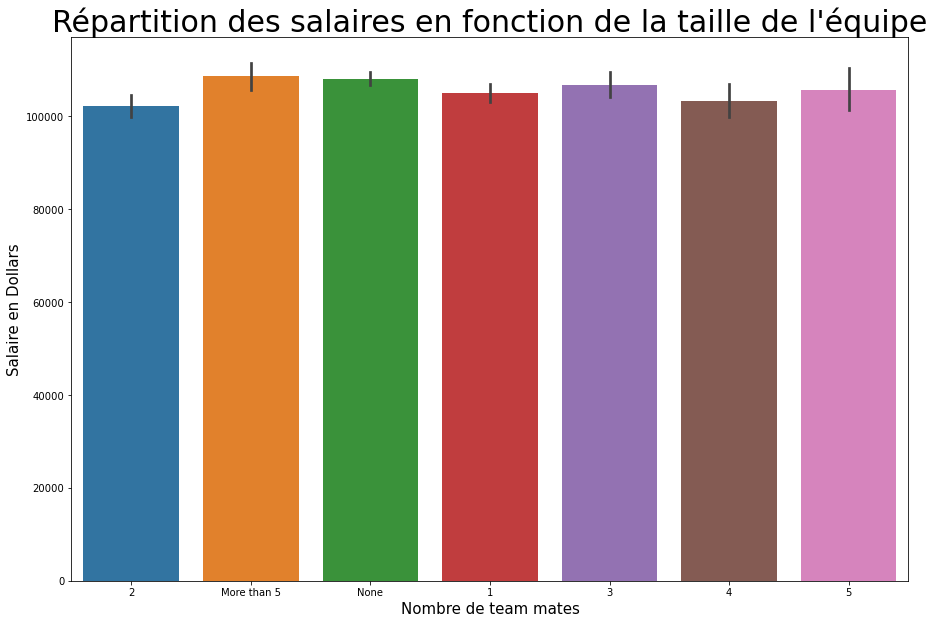

In [49]:
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction de la taille de l\'équipe', fontsize=30)
sns.barplot(x=df1['otherpeopleonyourteam'], y=df1['salaryusd'])
plt.xlabel('Nombre de team mates', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)

## APRES

Text(0, 0.5, 'Salaire en Dollars')

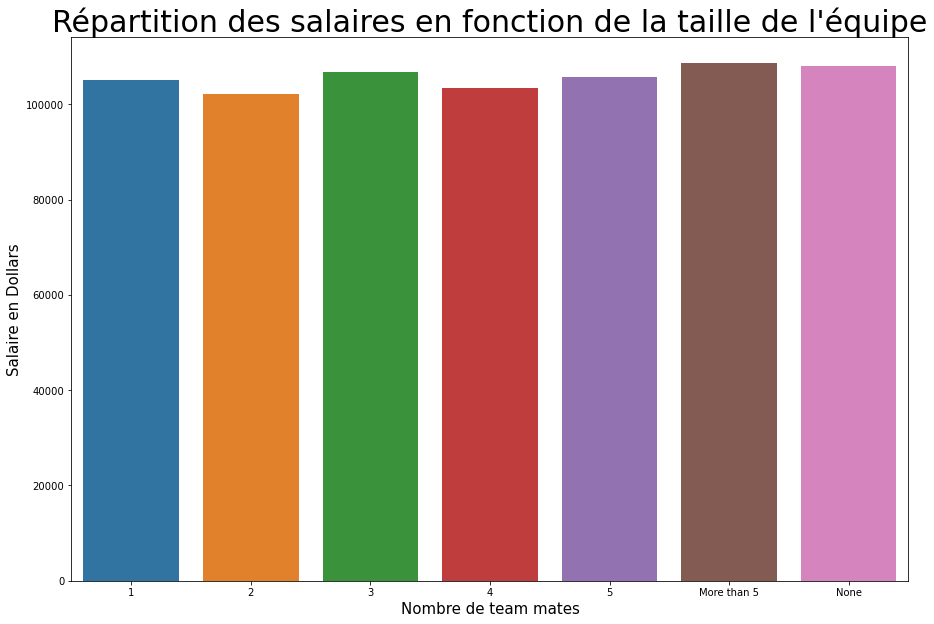

In [50]:
mean_by_team_size = round(df1.groupby(df1['otherpeopleonyourteam'])['salaryusd'].mean())
plt.subplots(figsize=[15,10])
plt.title('Répartition des salaires en fonction de la taille de l\'équipe', fontsize=30)
sns.barplot(x=mean_by_team_size.index, y=mean_by_team_size.values)
plt.xlabel('Nombre de team mates', fontsize=15)
plt.ylabel('Salaire en Dollars', fontsize=15)

# VII. Comparaison des salaires par genre et par job title

Sur cette étape, il manquait les explications sur la comparaison des salaires par genre et par job title

<AxesSubplot:xlabel='jobtitle', ylabel='salaryusd'>

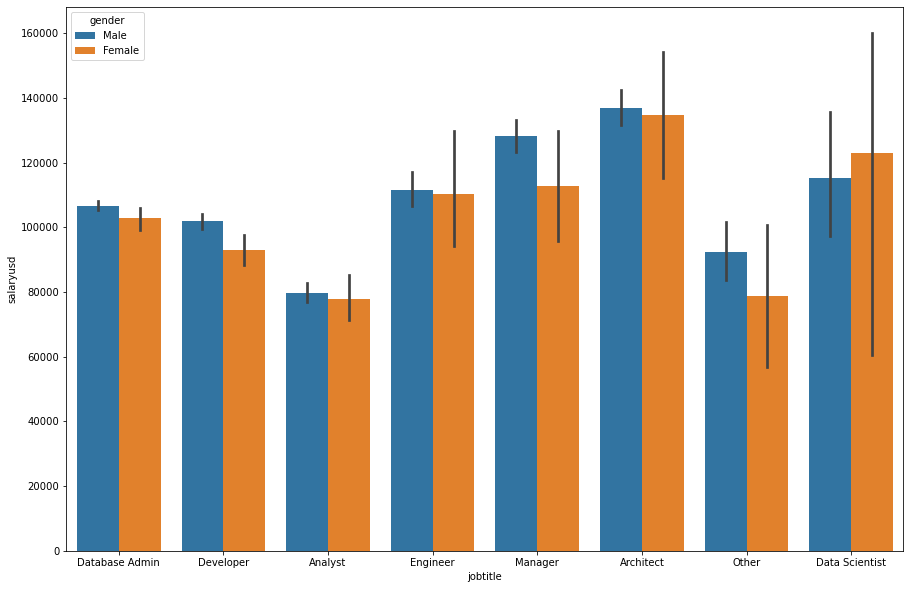

In [52]:
df1 = df1[df1['gender'] != 'Other']
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['jobtitle'], y=df1['salaryusd'], hue=df1['gender'])

Ce diagramme nous indique qu'il y a une différence notable entre les salaires des hommes et femmes pour un même job. En effet, les hommes seraient mieux payés que les femmes en général.

# VIII. Comparaison des salaires par genre

Le salaire moyen pour un homme dans le domaine I.T est de 107866.0$ et le salaire moyen pour une femme dans ce meme domaine est de 100988.0$


<AxesSubplot:xlabel='gender', ylabel='salaryusd'>

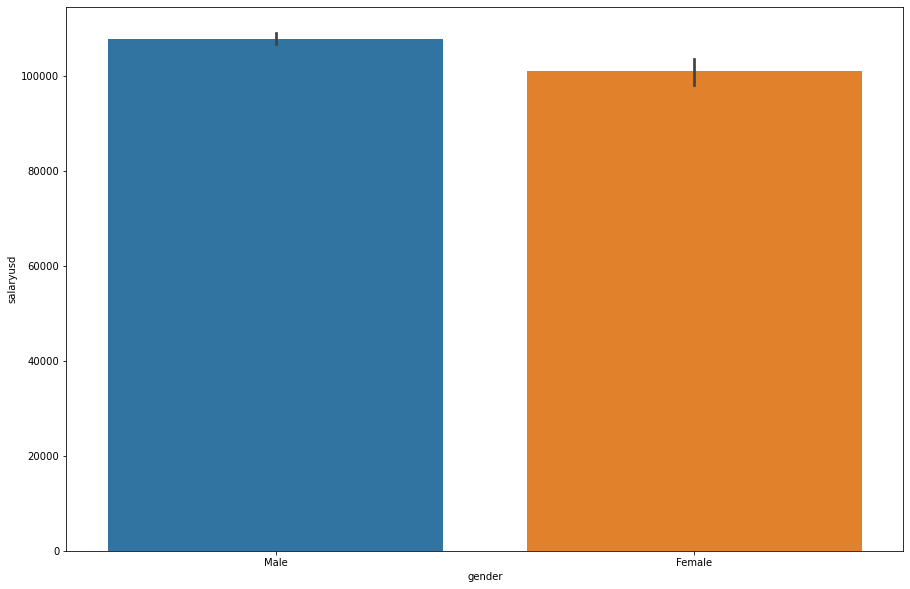

In [53]:
mean_salary_by_gender = round(df1.groupby(df1['gender'])['salaryusd'].mean())
print('Le salaire moyen pour un homme dans le domaine I.T est de {}$ et le salaire moyen pour une femme dans ce meme domaine est de {}$'.format(mean_salary_by_gender.values[1], mean_salary_by_gender.values[0]))
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['gender'], y=df1['salaryusd'])

D'après ce graphique, les hommes seraient mieux payés que les femmes dans le domaine IT aux Etats Unis.

# IX. Comparaison des salaires par genre, par nombre d'années d'experience et par jobtitle

<AxesSubplot:xlabel='jobtitle', ylabel='yearswiththistypeofjob'>

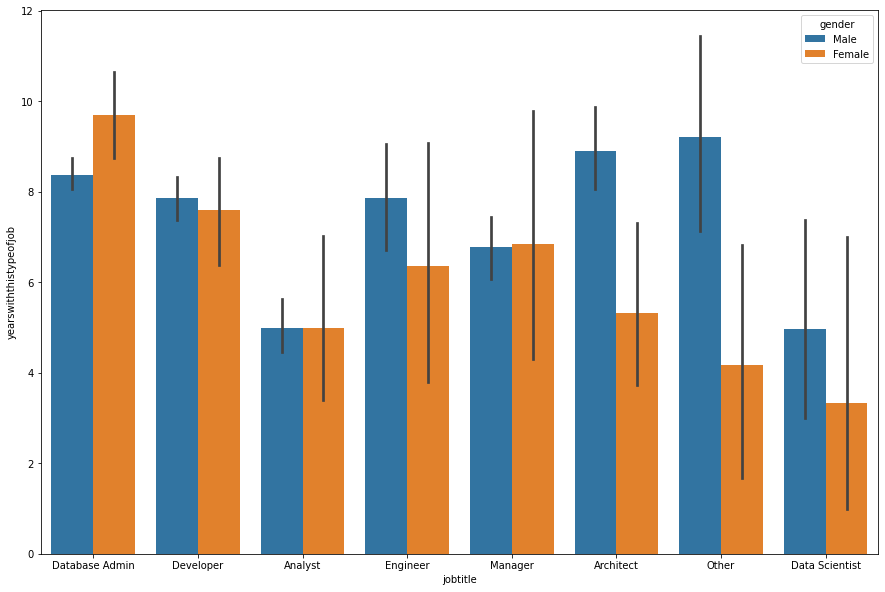

In [54]:
df1.groupby(['jobtitle', 'gender'])['salaryusd'].mean()
plt.subplots(figsize=[15,10])
sns.barplot(x=df1['jobtitle'], y=df1['yearswiththistypeofjob'], hue=df1['gender'])

Ce graphique nous montre, une fois de plus, que les hommes sont mieux payés que les femmes pour un même job title et par années d'experience aux Etats Unis.